<h1>
<font color="#ff2e2e">
Color Space Conversion
</font>
</h1>

In [85]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import math

<h3><font color = "#079e05"> This function is used to plot your result </font></h3>

In [86]:
def plotter(img_list, r, w, gray, wr, hr, fig_name = None):
    '''
    Plots images' list with its' caption and saves result image if you want.

    Parameters:
        img_list (list): The list of tuples of image and its' caption.
        r (int): The number of row(s).
        w (int): The number of colunm(s).
        gray (bool): The flag for plotting images in grayscale mode.
        wr (int): The width of one figure.
        hr (int): The height of one figure.
        fig_name (str): The name of the image of the plot. if not set this parameter the plot doesn't save.
    '''
    
    plt.rcParams['figure.figsize'] = (wr, hr)
    for i in range(len(img_list)):
        plt.subplot(r, w, i + 1)
        if img_list[i][2] == 'img':
            if gray:
                plt.imshow(img_list[i][0], cmap = 'gray')
            else:
                plt.imshow(img_list[i][0])
            plt.xticks([])
            plt.yticks([])
        elif img_list[i][2] == 'hist':
            plt.bar(np.arange(len(img_list[i][0])), img_list[i][0], color = 'c')
        else:
            raise Exception("Only image or histogram. Use third parameter of tuples in img_list and set it to img or hist.")
        plt.title(img_list[i][1])
    if fig_name is not None:
        plt.savefig(fig_name + '.png')
    plt.show()

part a

In [87]:
def convert_rgb_to_cmyk(r,g,b):
    #compute cmyk (values according to percent and return it
    r1=r/255
    g1=g/255
    b1=b/255
    k=1-max(r1,g1,b1)
    c=((1-r1-k)/(1-k))
    m=((1-g1-k)/(1-k))
    y=(1-b1-k)/(1-k)
    a=(c,m,y,k)
    return a
def convert_cmyk_to_rgb(c,m,y,k):
    #compute rgb according to (0,255)
    r=255 * (1-c)*(1-k)
    g=255 * (1-m) * (1-k)
    b= 255 * (1-y) * (1-k)
    m=(r,g,b)
    return m

In [88]:
b=convert_rgb_to_cmyk(50,70,130)
# print cmyk according to (0,100) for better  understand(show according to percent)
print("c:",round(b[0]*100),"m:",round(b[1]*100),"y:",round(b[2]*100),"k:",round(b[3]*100))
c=convert_cmyk_to_rgb(b[0],b[1],b[2],b[3])
print("r:",round(c[0]),"g:",round(c[1]),"b:", round(c[2]))

c: 62 m: 46 y: 0 k: 49
r: 50 g: 70 b: 130


<h3><font color = "#079e05"> BGR to YCbCr </font></h3>

part b

In [89]:
def convert_to_ycbcr(image):
    '''
    Converts the color space of the input image to the YCbCr color space.
    
    Parameters:
        image (numpy.ndarray): The input image.
    
    Returns:
        numpy.ndarray: The result image.
    '''
    #function for convert bgr to ycbr(opencv read image in bgr channel)
    result=cv2.cvtColor(image, cv2.COLOR_BGR2YCR_CB)
    #############
    # Your code #
    #############
    
    return result

<h3><font color = "#079e05"> BGR to HSV </font></h3>

In [90]:
def convert_to_hsv(image):
    '''
    Converts the color space of the input image to the HSV color space.
    
    Parameters:
        image (numpy.ndarray): The input image.
    
    Returns:
        numpy.ndarray: The result image.
    '''

    #############
    # Your code #
    #############
    #function for convert bgr to hsv(opencv read image in bgr channel)
    result = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    
    return result

<h3><font color = "#079e05"> Show the result </font></h3>

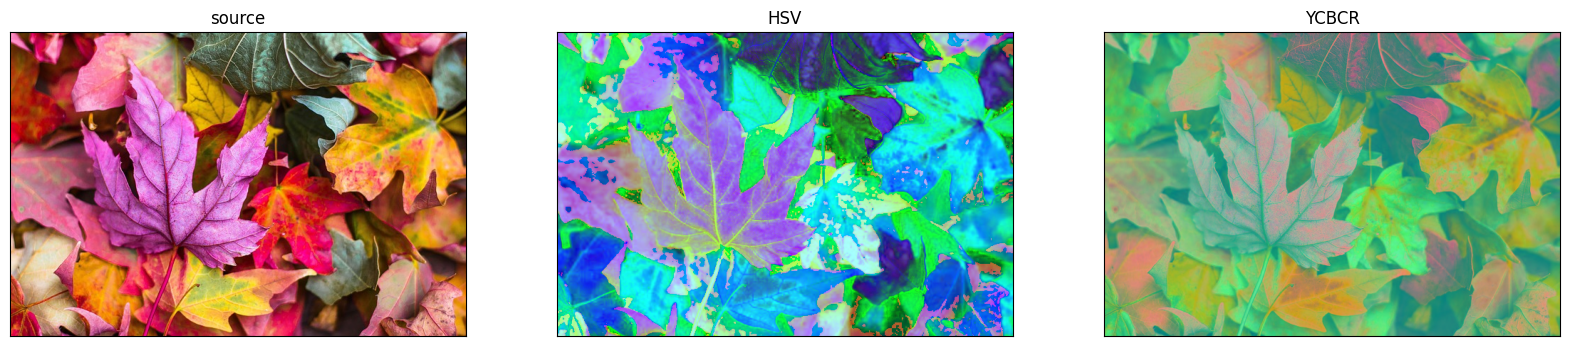

In [91]:
image_list = []
image = cv2.imread(os.path.join('images/Q1', '1.jpg'))
image_list.append([cv2.cvtColor(image, cv2.COLOR_BGR2RGB), 'source', 'img'])
image_list.append([convert_to_hsv(image), 'HSV', 'img'])
image_list.append([convert_to_ycbcr(image), 'YCBCR', 'img'])
plotter(image_list,1 , 3, True, 20, 10, '2A')

part c

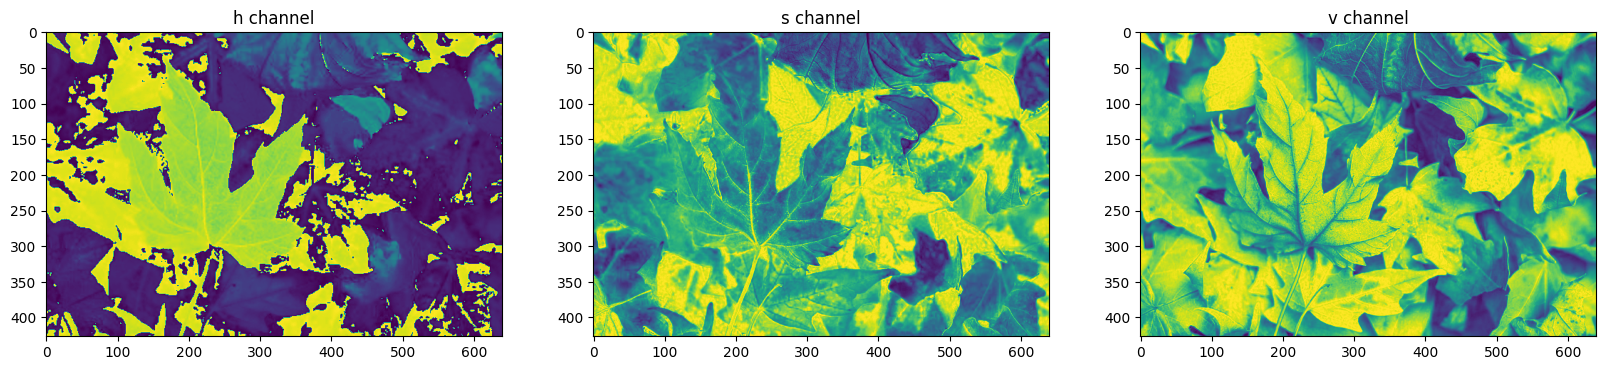

In [92]:
img_hsv=convert_to_hsv(image)
h, s, v = img_hsv[:, :, 0], img_hsv[:, :, 1], img_hsv[:, :, 2]
f=[h,s,v]
plt.subplot(1,3,1)
plt.title("h channel")
plt.imshow(h)
plt.subplot(1,3,2)
plt.title("s channel")
plt.imshow(s)
plt.subplot(1,3,3)
plt.title("v channel")
plt.imshow(v)

<h1>
<font color="#ff2e2e">
Finding Differences
</font>
</h1>

In [93]:
def dif(image1, image2):
    '''
    Creates a new image that differences between two input images are shown.
    
    Parameters:
        image1 (numpy.ndarray): The first input image.
        image2 (numpy.ndarray): The second input image.
    
    Returns:
        numpy.ndarray: The result difference image.
    '''
    #############
    # Your code #
    #############
    x1,y1=image1.shape
    x11,y11=image2.shape

    print(x11,x1,y11,y1)

    image11=cv2.resize(image2,(y1,x1))
    x2,y2=image11.shape
    print(x1,x2,y1,y2)    
    
    img=np.ndarray([x1,y1,3],np.uint8)
    img[:,:,1]=image1[:,:]
    img[:,:,2]=image1[:,:]
    img[:,:,0]=image11[:,:]
    result=img
    return result

916 917 922 921
917 917 921 921


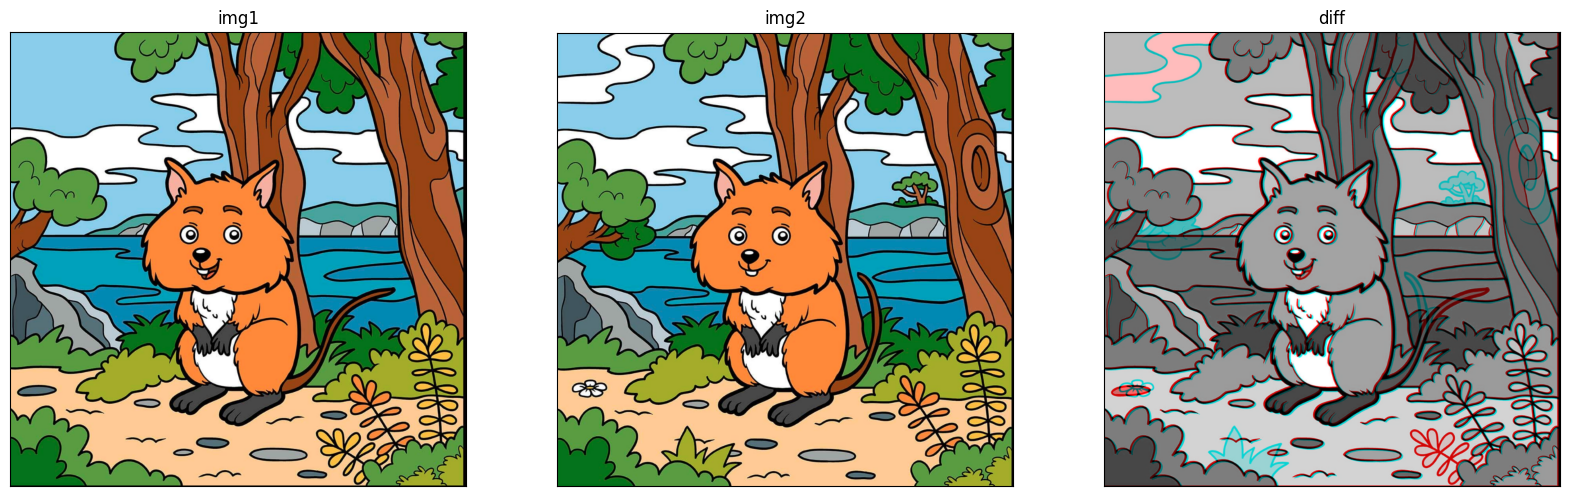

In [94]:
image_list = []
image1 = cv2.imread(os.path.join('images/Q1', '2.png'))
image_list.append([cv2.cvtColor(image1, cv2.COLOR_BGR2RGB), 'img1', 'img'])
image2 = cv2.imread(os.path.join('images/Q1', '3.png'))
image_list.append([cv2.cvtColor(image2, cv2.COLOR_BGR2RGB), 'img2', 'img'])

image1 = cv2.imread(os.path.join('images/Q1', '2.png'), cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread(os.path.join('images/Q1', '3.png'), cv2.IMREAD_GRAYSCALE)
image_list.append([dif(image1, image2), 'diff', 'img'])

plotter(image_list,1 , 3, True, 20, 10, '2B')